<a href="https://colab.research.google.com/github/coma-nrdhs/COMA_4/blob/main/supervised_learning_classification_8_oct_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
headernames = ['Roll', 'Name', 'Beng', 'Eng', 'Math', 'Science', 'PEdu', 'WEdu', 'Comp', 'section']

In [89]:
data = df=pd.read_csv("/content/drive/MyDrive/data_5_edited.csv" , names=headernames)
data.shape
data.drop(columns=['Roll', 'Name',  'Eng','Science','PEdu', 'WEdu', 'Comp' ], inplace=True)

In [90]:
data.head()

,Beng,Math,section
0,29,25,A
1,29,11,A
2,29,25,A
3,28,21,A
4,29,27,A


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Beng', ylabel='Math'>

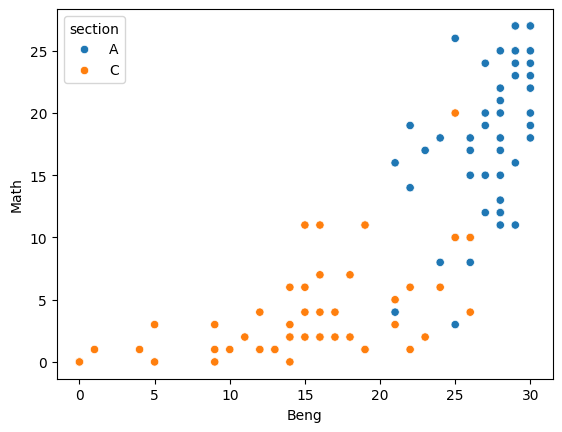

In [92]:
sns.scatterplot( data = df, x='Beng', y='Math', hue = 'section')

In [93]:
X = data.iloc[:, :-1].values
y = data.iloc[:,2].values

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=1)

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)



In [97]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train);

In [98]:
y_pred = classifier.predict(X_test_scaled)
y_pred

array(['C', 'C', 'A', 'A', 'C', 'A', 'C', 'C', 'C', 'C', 'A', 'A', 'C',
       'A', 'A', 'C', 'C', 'C', 'C', 'A'], dtype='<U1')

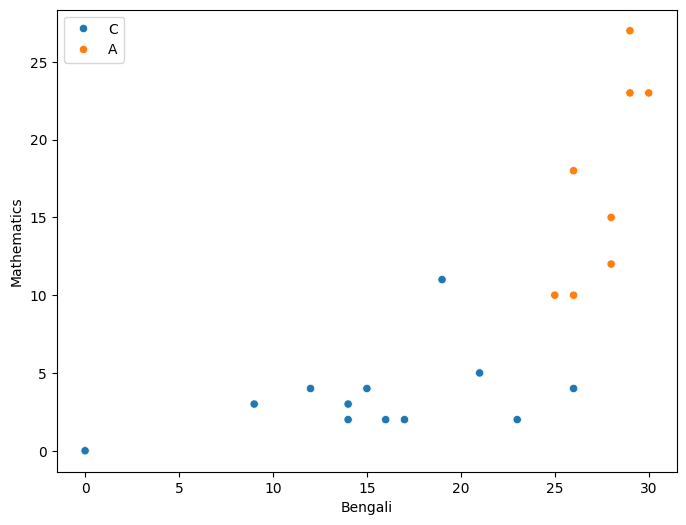

In [109]:
plt.figure(figsize=(8, 6))
sns.scatterplot( x=X_test[:,0], y=X_test[:,1], hue = y_pred)
plt.xlabel('Bengali')
plt.ylabel('Mathematics')
plt.show()

In [100]:
result = pd.DataFrame({'Actual': y_test, 'Predict' : y_pred})
result

,Actual,Predict
0,C,C
1,C,C
2,A,A
3,A,A
4,C,C
5,A,A
6,C,C
7,C,C
8,C,C
9,C,C


In [101]:

test_point = np.array([[25, 10, ]])
test_point_pred = classifier.predict(sc.transform(test_point))
test_point_pred
#print(classifier.predict(scaler.transform([[22, 22]])))

array(['A'], dtype='<U1')

In [102]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0],
       [ 0, 12]])

In [103]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  1.0
